
# online lab 3 - Maximum Likelihood Estimation, Linear Regression 



## Content 

1. Review likelihood, log-likelihood, maximum likelihood estimates
2. Compute maximum likelihood estimate for a Gaussian model
3. Introduce linear regression
4. Introduce gradient ascent/descent methods
5. Apply MLE linear regression to a dataset
6. Use sklearn and statmodels to solve regression problem


## Fitting Distributions to Sample Data - Likelihood function

We introduced **Likelihood** function, which tells us how well our model fits the data for particular parameters

$$
\mathcal{L}(\theta|\mathbf x) = p(\underbrace{\mathbf x }_{Data} | \underbrace{\theta}_{\textrm{parameters}})
$$

It is common to assume the training examples are independent and identically distributed,commonly abbreviated to **i.i.d.**, hence:

$$
\mathcal{p}(\theta|\mathbf x ) = \prod_i p(x_i | \theta)
$$

An example of model

$$
p(x|\theta) = \theta^x(1-\theta)^{1-x}
$$

For data $\mathbf x  = \{0,1,1,1\}$, the likelihood function is defined as

$$
\mathcal{p}(\theta |\mathbf x ) = \prod_i p(\theta |x_i =  p(x_1 |\theta)p(x_2 |\theta)p(x_3 |\theta)p(x_4 |\theta) = (1-\theta)\theta^3
$$

## Log-Likelihood Function

\begin{exercise}

\end{exercise}
We introduced log-likelihood function

$$
\log \mathcal {L} (\theta | Data).
$$

Given data ${Data}=\{0,0,0,1\}$ and model $p(x|\theta) = \theta^x(1-\theta)^{1-x}$ 

**<font color='red'> Q: Which is more likely (better fit the data) $\theta = 0.25$ or $\theta = 0.99$ </font>**


Use the following code  to answer the above question


In [31]:
import numpy as np
#from __future__ import print_function
def likelihood(theta,xs):
    p = 1.0
    for x in xs:
        p = p*theta**x * (1-theta)**(1-x)
    return p
data = [0,0,0,1]
p1 = likelihood(0.25,data)
print("theta = 0.25 p = ",p1,",log-likelihood =",np.log(p1))
p2 = likelihood(0.99,data)
print("theta = 0.99 p = ",p2,",log-likelihood =",np.log(p2))

theta = 0.25 p =  0.10546875 ,log-likelihood = -2.2493405784752336
theta = 0.99 p =  9.900000000000026e-07 ,log-likelihood = -13.825560893817773


$\log \mathcal {L} (\theta | Data)\space$
  is the log-likelihood of the value of parameter $\space\theta \space$ given the observed data.
We choose $ \theta=0.25 $ because it is clearly more likely: 
$
\log \mathcal {L} (0.25 | Data) > \log \mathcal {L}(0.99 | Data)
$


## Maximum Likelihood Estimate (MLE)

Maximum likelihood estimation is one of the key techniques employed in statistical signal processing for a wide variety of applications from signal detection to parameter estimation. In the following, we consider a simple experiment and work through the details of maximum likelihood estimation to ensure that we understand the concept in one of its simplest applications.

### The case of Benoulli Modle

Suppose we have coin and want to estimate the probability of heads ($p$) for it. The coin is Bernoulli distributed:

$$ \phi(x)= p^x (1-p)^{(1-x)} $$

where $x$ is the outcome, *1* for heads and *0* for tails. The $n$ independent flips, we have the likelihood:

$$ \mathcal{L}(p|\mathbf{x})= \prod_{i=1}^n p^{ x_i }(1-p)^{1-x_i} $$

This is basically notation. We have just substituted everything into $ \phi(x)$ under the independent-trials assumption. 

The idea of *maximum likelihood* is to maximize this as the function of $p$ after plugging in all of the $x_i$ data. This means that our estimator, $\hat{p}$ , is a function of the observed $x_i$ data, and as such, is a random variable with its own distribution.

We talked about finding a mazimizer of the log-likelihood called **Maximum Likelihood Estimate** (MLE)

$$
\theta^{MLE} = \arg\max_{\theta} \mathcal L (\theta | Data)
$$

which can be interpreted as the parameter for which the data is most probable under the model

### The case of Bernoulli Model - Symbolic solution MLE
We recalled that in order to maximize a functions, $f(x)$, we finding $x$ for which

$$
\frac{\partial}{\partial x} f(x) = 0.
$$

Using this approach to find MLE for a Bernoulli model 

$$
p(x|\theta) = \theta^x(1-\theta)^{1-x}
$$

we obtain

$$
\theta^{MLE} = \frac{
\overbrace{ \sum_i [x_i = 1] }^{ \textrm{count of 1s in data} } }{ \underbrace{
 \sum_i [x_i = 1]
 }_{\textrm{count of 1s in data} } + 
 \underbrace{
  \sum_i [x_i = 0]
 }_{\textrm{count of 0s in data}}}
$$

\begin{example}
Write code to a) find a sample from Bernoulli distribution and b) use it to estimate the parameter of Bernoulli distribution

\end{example}


[0 1 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]
p**37*(1 - p)**63
37/100


<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in log
  return (37*log(p) + log((1 - p)**63))


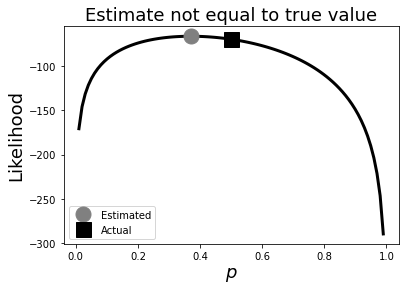

In [32]:
# coin-flipping experiment using a Bernoulli distribution
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
import sympy
import numpy as np
%matplotlib inline
#Simulating
p_true = 1/2.0
fp = bernoulli(p_true)
xs = fp.rvs(100)
print(xs[:30])


x,p,z = sympy.symbols('x, p, z', positive = True)
phi = p**x*(1-p)**(1-x)
L = np.prod([phi.subs(x, i) for i in xs])
print(L)

logJ = sympy.expand_log(sympy.log(L))
sol, = sympy.solve(sympy.diff(logJ, p),p)
print(sol)

#This is the plotting part, which does not work because LogJ is not defined
fig, ax = plt.subplots()
x = np.linspace(0,1,100)
ax.plot(x, list(map(sympy.lambdify(p, logJ, 'numpy'),x)), 'k-', lw=3)
ax.plot(sol, logJ.subs(p, sol), 'o', color = 'gray', ms=15, label = 'Estimated')
ax.plot(p_true, logJ.subs(p, p_true), 's', color = 'k', ms=15, label = 'Actual')
ax.set_xlabel('$p$', fontsize = 18)
ax.set_ylabel('Likelihood', fontsize = 18)
ax.set_title('Estimate not equal to true value', fontsize = 18)
ax.legend(loc=0)

\begin{example}
Exists population with exponential distribution and we should estimate $\lambda$ (rate) parameter of the actual population by having a sample from this population.
\end{example}

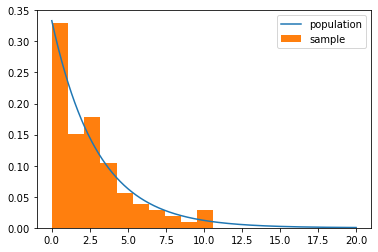

In [33]:
import numpy as np
from scipy.stats import expon
import matplotlib.pyplot as plt

population_rate = 3
sample_size = 100

get_sample = lambda n: np.random.exponential(population_rate, n)
xs = np.arange(0, 20, 0.001)
ys = expon.pdf(xs, scale=population_rate)
plt.plot(xs, ys, label='population')

sample = get_sample(sample_size)
plt.hist(sample, density=True, label='sample')

plt.legend()
plt.show()

### log-likelihood function for  exponential distribution in python:

parameter value:  2.6200000000000014


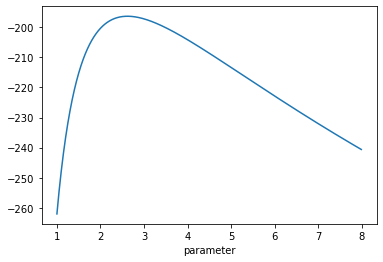

In [34]:
# graphical solution
log_likelihood = lambda rate:  sum([np.log(expon.pdf(v, scale=rate)) for v in sample])

rates = np.arange(1, 8, 0.01)
estimates = [log_likelihood(r) for r in rates]
plt.xlabel('parameter')
plt.plot(rates, estimates)
print('parameter value: ', rates[estimates.index(max(estimates))])

### Solving optimization problems utilizing scipy.optimization library

In [35]:
from scipy.optimize import minimize
from numpy.random import rand
 
# objective function
def objective(x):
	return x[0]**2.0 + x[1]**2.0
 
# define range for input
r_min, r_max = -5.0, 5.0
# define the starting point as a random sample from the domain
pt = r_min + rand(2) * (r_max - r_min)
# perform the l-bfgs-b algorithm search
result = minimize(objective, pt, method='L-BFGS-B')
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = objective(solution)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 9
Solution: f([ 5.09901809e-07 -9.72271166e-08]) = 0.00000


\begin{exercise}
Find the maximum of the log-likelihood function for  exponential distribution using the `maximize` routine from scipy.optimization library. 
Hint: Study the above example.

\end{exercise}


In [36]:
# using the sample of the exponential distribution of the previous example
# population rate was 3 

def loglike_expo (x):
    return(len(sample)*np.log(x[0])+(1/x[0])*sum(sample))

result = minimize(loglike_expo, 1, method='L-BFGS-B')
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = loglike_expo(solution)
print('parameter value: %.5f' % (solution))
print('Solution: log_likelihood(%s) = %.5f' % (solution, evaluation))

Status : b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
Total Evaluations: 18
parameter value: 2.62039
Solution: log_likelihood([2.62038747]) = 196.33222


# Finding $\mu^{MLE}$ of Gaussian Distribution

The maximum likelihood estimate for parameter $\mu$ of a Gaussian distribution is equivalent of maximizing the following function with respect to $\mu$

$$
p(x|\mu,\sigma^2)= \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x-\mu)^2}
$$



Likelihood  $\mathcal L$ function is

$$
\mathcal L(\mu,\sigma^2|\mathbf x) = \prod_{i=1}^N p(x_i|\mu,\sigma^2) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2}
$$

Log- likelihood  $\mathcal L$ function is

$$
\log\mathcal L(\mu,\sigma^2|\mathbf x) = \log \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2\sigma^2}(x_i-\mu)^2} =  \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2} -\frac{1}{2\sigma^2}(x_i-\mu)^2\right]
$$



Our recipe is:

1. Take the function you want to maximize: 

$$
f(\mu) = \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}(x_i-\mu)^2\right]
$$

2. Compute its first derivative: $\frac{\partial}{\partial \mu} f(\mu)$
3. Equate that derivative to zero and solve: $\frac{\partial}{\partial \mu} f(\mu) = 0$



\begin{exercise}

\begin{enumerate}
\item Compute the derivative of the above function

\item Solve the equation to find a critical point

\end{enumerate}
\end{exercise}


partial derivative with respect to $\mu$

$$
\frac{\partial}{\partial \mu} f(\mu) = \sum_{i=1}^N \left[ \frac{1}{\sigma^2}(x_i - \mu)\right]
$$

We equate it to zero and solve

$$
\sum_{i=1}^N \left[ \frac{1}{\sigma^2}(x_i - \mu)\right] = 0 \Longrightarrow \sum_{i=1}^N (x_i - \mu) = 0 \Longrightarrow \sum_{i=1}^N x_i - N\mu = 0 \Longrightarrow \mu=\frac{\sum_{i=1}^N x_i}{N}
$$

# Finding ${\sigma^{2}}^{MLE}$ of Gaussian Distribution

Our recipe is:

1. Take the function you want to maximize: 

$$
f(\sigma^{2}) = \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}(x_i-\mu)^2\right]
$$

2. Compute its first derivative: $\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2})$
3. Equate that derivative to zero and solve: $\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2}) = 0$



\begin{exercise}
What is the value of $\sigma^2$?

\end{exercise}


$$
f(\sigma^{2}) = \sum_{i=1}^N \left[-\frac{1}{2}\log{2\pi\sigma^2}-\frac{1}{2\sigma^2}(x_i-\mu)^2\right] = - \frac{N}{2}\log{2\pi} - \frac{N}{2}\log{\sigma^2} - \frac{1}{2\sigma^2} \sum_{i=1}^N \left[(x_i-\mu)^2\right]
$$

partial derivative with respect to $\sigma^2$ :

$$
\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2}) = - \frac{N}{2\sigma^{2}} -  \left(\frac{1}{2} \sum_{i=1}^N \left[{(x_i - \mu)}^{2}\right]\right)\frac{\partial}{\partial \sigma^{2}}\left(\frac{1}{\sigma^{2}}\right) \\
= - \frac{N}{2\sigma^{2}} -  \left(\frac{1}{2} \sum_{i=1}^N \left[{(x_i - \mu)}^{2}\right]\right)\left(-\frac{1}{{(\sigma^{2})}^{2}}\right) = \frac{1}{2\sigma^{2}} \left(\frac{1}{\sigma^{2}} \sum_{i=1}^N \left[{(x_i - \mu)}^{2} \right] - N \right)
$$

Which, if we rule out $\sigma^{2} = 0$, is equal to zero only if 

$$
\frac{\partial}{\partial \sigma^{2}} f(\sigma^{2}) =0 \Longrightarrow \sigma^{2} = \frac{1}{N} \sum_{i=1}^N \left[{(x_i - \mu)}^{2} \right]
$$





\begin{exercise}
Estimate the parameters of the normal distribution from a normal sample using numerical optimization

\end{exercise}


In [37]:
sample=np.random.normal(2,7,100)

def loglike_normal(x):
    return(len(sample)*np.log(2*np.pi)/2+len(sample)*np.log(x[1]**2)/2+((1/(2*x[1]**2))*sum((sample-x[0])**2)))
result = minimize(loglike_normal, [1,1], method='L-BFGS-B')
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = loglike_normal(solution)
print('Sample MLE mean ',solution[0])
print('Sample MLE variance ',solution[1])
print('Solution: log_likelihood(%s) = %.5f' % (solution, evaluation))

Status : b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
Total Evaluations: 48
Sample MLE mean  1.2266729485235306
Sample MLE variance  7.959488504286145
Solution: log_likelihood([1.22667295 7.9594885 ]) = 349.32953


# Probabilistic Linear Regression

One of the simplest examples of supervised learning is **linear regression**

Aim to model the relationship between an outcome variable $y$ (a.k.a dependent variable or response variable), and a vector of explanatory variables $\mathbf{x}=(x_1,x_2,\dots,x_N)$ (independent variables, covariates, or features)



Formally, we would write

$$
\begin{aligned}
y &= \beta_0 + \sum_j x_j \beta_j + \epsilon \\
\epsilon &\sim \mathcal N ({0},{\sigma^2})
\end{aligned}
$$

or more compactly

$$
y | \mathbf x \sim \mathcal N ({\beta_0 + \sum_j x_j \beta_j},{ \sigma^2})
$$

Notice that the function is linear in the parameters $\beta=(\beta_0,\beta_1,\dots,\beta_p)$.

Taking a closer look at the model:

$$
y | \mathbf x  \sim \mathcal N ({\beta_0 + \sum_{j=1}^p x_j \beta_j},{ \sigma^2})
$$

* $y$ is a target variable we are modeling 
* $\mathbf x$ is a vector of $p$ features (aka predictors and covariates)
* $\beta_0$ is a **bias** which does not depend on the features
* $\beta_1,\dots,\beta_p$ is a vector of weights (one per feature)
* $\sigma^2$ is variance -- how far can we expect $y$ to be away from $\beta_0 + \sum_{j=1}^p x_j \beta_j$


**<font color='red'> Q: Which of these items above are parameters? Hint: Which values can we adjust to get a better prediction?</font>**





$ β_0 , β_j $




Probability of target variable $y$

$$
p(y | \mathbf x,\beta_0,\beta,\sigma^2) =  \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2\sigma^2}\left(y_i-\underbrace{(\beta_0 + \sum_j x_j \beta_j)}_{\textrm{mean of the Gaussian}}\right)^2\right\}
$$






We start by writing out a likelihood for linear regression is

$$
\mathcal L(\beta_0,\beta,\sigma^2 | \mathbf x,\mathbf y) = 
\prod_{i=1}^N p(y|\mathbf x,\beta_0,\beta,\sigma^2) = 
\prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right\}
$$

Log-likelihood for linear regression is

$$
\log\mathcal L (\beta_0,\beta,\sigma^2 | \mathbf x,\mathbf y) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right] \\ = - \frac{N}{2}\log(2\pi\sigma^2) -\frac{1}{2\sigma^2} \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2 =  - \frac{N}{2}\log(2\pi\sigma^2) -\frac{RSS}{2\sigma^2} 
$$


We will refer to expression $y_i-(\beta_0 + \sum_j x_j \beta_j)$ as **residual**, and hence **RSS** stands for **residual sum of squares** or **sum of squared errors** and is defined by 

$$
RSS = \sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$

And RSS/N is called the **mean squared error** or **MSE**

$$
MSE = \frac{1}{N}\sum_{i=1}^N \left(y_i-(\beta_0 + \sum_j x_{i,j} \beta_j)\right)^2
$$

Hence, maximizing log-likelihood is equivalent to minimizing RSS or MSE

Our goal is still to find $\beta_0,\beta$ such that

$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} \log\mathcal L (\beta_0,\beta,\sigma^2 | \mathbf x,\mathbf y) &= 0 \\
\frac{\partial}{\partial \beta_1} \log\mathcal L (\beta_0,\beta,\sigma^2 | \mathbf x,\mathbf y) &= 0 \\
\cdots&\\
\frac{\partial}{\partial \beta_p} \log\mathcal L (\beta_0,\beta,\sigma^2 | \mathbf x,\mathbf y) &= 0
\end{aligned}
$$

Because that will guarantee the parameters can not be further changed to improve the likelihood

# Introducing Gradient Ascent

Previously, we solved  equations of type $\frac{\partial}{\partial \theta} \log\mathcal L (\theta | Data) = 0$ in a closed-form

Here, we will develop a different approach using numerical optimization

Let's first consider how we can maximize a univariate differentiable function $f(x)$ iteratively

Text(2.5, -10.0, 'Linear\napproximation')

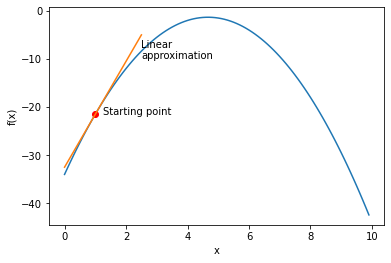

In [38]:
x = np.arange(0.0,10.0,0.1)
f = -(x-4.0)**2.0 - 0.5*(x-6.0)**2.0
dfdx = -(x-4.0)*2 - (x-6.0)
plt.plot(x,f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x[10],f[10],'ro')
plt.annotate('Starting point',(x[10]+0.25,f[10]))
x1 = x[10]-1
x2 = x[10]+1.5
f1 = f[10]-dfdx[10]*1
f2 = f[10]+dfdx[10]*1.5
plt.plot([x1,x2],[f1,f2])
plt.annotate('Linear\napproximation',(x2,f2-5))

**<font color='red'> Q: Starting from the labeled point, should we increase or decrease $x$ to get to the maximum of function $f(x)$? Why? </font>**

We should increase x in order to get to the maximum of function $f(x)$ , because its maximum value seems to be for a greater value of x , specificly $x=\frac{14}{3}\space$ if we solve $\frac{df(x)}{dx}=0$ .

# Optimize single variable  functions
Another way to see this is to consider a very simplified version of Taylor's theorem

**Theorem.** Given a function $f(\cdot)$ which is smooth at $x$

$$
f(x + d) = f(x) + f'(x)d + O(d^2)
$$

In words, close to $x$ function $f(\cdot)$ is very close to being a linear function of $d$

$$
f(x + \color{blue}{d}) = f(x) + f'(x)\color{blue}{d}
$$

Slope of the best linear approximation is $f'(x)$, i.e.,$\text {   }  f'(x)$ tells us in which direction function grows

 <img src="./Images/Derivative.gif" width="700" align="center"/> 


# Optimize Multivariate  Functions
Multivariate functions are a bit harder to visualize, so we view them like topographical maps

Contours connect nearby points with the same altitutde (function value)

<img src="./Images/Topographic_Image.png"  width="1400" align="center"/> 

Once we are sure that the gradients are correct, we can proceed to optimize the function

To do that, we use **gradient ascent (GA)** or **gradient descent (GD)** depending on whether we are maximizing or minimizing a function

Recall that we have $f : \mathbb{R}^{n} \rightarrow \mathbb{R}$ is convex and differentiable

We want to solve
$$
\begin{aligned}
GA: \, \mathop{\textrm{argmax}}_{\mathbf{\theta} \in \mathbb{R}^{n}} f(\mathbf{\theta}) \; \; \; \; \; \; GD: \, \mathop{\textrm{argmin}}_{\mathbf{\theta} \in \mathbb{R}^{n}} f(\mathbf{\theta})
\end{aligned}
$$

<img src="./Images/OptimizationProblems.png"  align="center"/> 


* Gradient Ascent\Descent: Choose initial ${\mathbf{\theta}^{(0)}} \in \mathbb{R}^{n}$, repeat:
$$  \;
\begin{aligned}
{\mathbf{\theta}^{(k)}} = {\mathbf{\theta}^{(k-1)}} \pm t_{k}.\nabla f({\mathbf{\theta}^{(k-1)}}), k =1,2,3,\ldots
\end{aligned}
$$
Where $t_{k}$ is the step size (learning rate) at step $k$

* Stop at some point using a stopping criteria (depend on the problem we are solving), for example:
 * Maximum number of iterations reached
 * $| f({\mathbf{\theta}^{(k)}}) − f({\mathbf{\theta}^{(k-1)}}) | < \epsilon$
 
<img src="./Images/GD.gif"  align="center"/> 

 **<font color='red'> Q: What would you change for gradient descent? How would you specify the learning rate $(t_{k})$?</font>**

As explained below the learning rates can diverge if $t$ is too large, and convergence can be slow if $t$ is too small.  Perhaps we should use an adaptive learning rate.


Choosing a step size or learning rate ($t_{k}$)

1. Fixed step size
 * Simply take $t_{k} = t$ $\forall$ $k$
 * However, can diverge if $t$ is too large, and convergence can be slow if $t$ is too small

![](./Images/LearningRate.gif)



2. Use Line search Strategy
 * At each iteration, do the best you can along the direction of the gradient,
 
 $$
\begin{aligned}
t = \mathop{\textrm{argmax}}_{s \geq 0} f(\mathbf{\theta} + s.\nabla f({\mathbf{\theta}}))
\end{aligned}
 $$
 
  <img src="./Images/Line_Search1.gif"  align="center"/> 
  
 * Usually, it is not possible to do this minimization exactly, and approximation methods are used
 * Backtracking Line Search: 
     * Choose an initial learning rate ($t_{k} = t_{init})$, and update your parameters ${\mathbf{\theta}^{(k)}} = {\mathbf{\theta}^{(k-1)}} \pm t_{k}.\nabla f({\mathbf{\theta}^{(k-1)}})$ 
     * Reduce learning rate $t_{k} = \alpha . t_{init}$, where  $0< \alpha <1 $
     * Repeat by reducing $\alpha$ till you see an improvmnet in $f({\mathbf{\theta}^{(k)}})$

Much as in the case of univariate function, the direction in which the function changes is described by derivatives

A vector composed of partial derivatives of a function is called gradient

$$
\nabla f(\mathbf x) = \left[\begin{array}{c} \frac{\partial}{\partial x_1} f(\mathbf x) \\  \vdots \\ \frac{\partial}{\partial x_p} f(\mathbf x) \end{array}\right]
$$

and points the direction in which the function changes the most.


\begin{exercise}

Consider the function

$$
f(x,y) = -(x-1)^2 - (y- 2)^2 + \frac{1}{2}xy
$$

a) Find the gradient of this function

b) Indicate the use of the gradient to find a maxim or minimum of a function

c) Implement the gradient algorithm to find the maximum  of this function using autogrand

\end{exercise}





a) Find the gradient of this function symbolically by hand



b) Indicate the role of the gradient to find a maximum or a minimum of a function


a)
$$
\nabla f(x,y) = \left[\begin{array}{c}\frac{\partial}{\partial x}  f(x,y) \\ \frac{\partial}{\partial y} f(x,y)\end{array}\right] = \left[\begin{array}{c}-2x+\frac{1}{2}y+2 \\ \frac{1}{2}x-2y+4\end{array}\right]
$$

b)
To find the minimum or the maximum of a function, we set the gradient to zero because the value of the gradient at the extrema of a function is always zero

or 
we itarete $\space {\mathbf{\theta}^{(k)}} = {\mathbf{\theta}^{(k-1)}} \pm t_{k}.\nabla f({\mathbf{\theta}^{(k-1)}}), k =1,2,3,\ldots$

**YOUR ANSWERS HERE**

c) Implement the gradient ascent algorithm to find the maximum of the above function

i) Consider (1,1) as initial guess of the point at which the function has a maximum

ii) Use as learning rate the value 0.0004

iii) Iterate 80000 times to find the maximum 

In [39]:
# The given function 
import numpy as np
from autograd import grad
def f(x,y):
  return (-(x-1)**2 - (y-2)**2 + x*y/2)

# the gradient of f using autogrand 
grad_f_x = grad(f,0) # partial derivative with respect to x
grad_f_y = grad(f,1) # partial derivative with respect to y
# prints the values of the gradient at (1.,1.) point
print(grad_f_x(1.,1.))
print(grad_f_y(1.,1.))

0.5
2.5


In [40]:
eta = 0.0004
x = 1.0
y = 1.0
for i in range(80001):
    x=x+eta*grad_f_x(x,y)
    y=y+eta*grad_f_y(x,y)
    if (i % 5000 == 0):
      print("\nEpoch:",i, "\nxi approximation=",x,"\nyi approximation=",y,"\ngradient_x", grad_f_x(x,y), "\ngradient_y",grad_f_y(x,y), "\nf(x,y)=", f(x,y))



Epoch: 0 
xi approximation= 1.0002 
yi approximation= 1.00100004 
gradient_x 0.5001000200000001 
gradient_y 2.4980999199999996 
f(x,y)= -0.4974008400760014

Epoch: 5000 
xi approximation= 1.5529788601395578 
yi approximation= 2.347617557773938 
gradient_x 0.06785105860785356 
gradient_y 0.08125431452190246 
f(x,y)= 1.3962766332237297

Epoch: 10000 
xi approximation= 1.5975461390157422 
yi approximation= 2.3975107285209862 
gradient_x 0.003663086229008794 
gradient_y 0.0037516124658986127 
f(x,y)= 1.3999908362568543

Epoch: 15000 
xi approximation= 1.5998771985276166 
yi approximation= 2.3998769923086867 
gradient_x 0.00018409909911021316 
gradient_y 0.00018461464643493297 
f(x,y)= 1.3999999773416691

Epoch: 20000 
xi approximation= 1.5999938881823563 
yi approximation= 2.39999388838185 
gradient_x 9.167826212408414e-06 
gradient_y 9.16732747791027e-06 
f(x,y)= 1.3999999999439705

Epoch: 25000 
xi approximation= 1.5999996960404728 
yi approximation= 2.3999996961206884 
gradient_x 4.559

**Find the maximum using the scipy.optimize function** 

In [41]:

from scipy.optimize import minimize

def g(x):
    return -(-(x[0]-1.)**2 - (x[1]-2.)**2 + x[0]*x[1]/2)
x0 = (1.,1)

minimize_estimate = minimize(g, x0)
minimize_estimate   


      fun: -1.399999999978257
 hess_inv: array([[0.54955322, 0.13200999],
       [0.13200999, 0.53344098]])
      jac: array([-9.28342342e-06,  2.99513340e-06])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([1.59999544, 2.40000036])

# Least squares optimization 


In least squares problems, we usually have $m$ labeled observations $\left(x_{i}, y_{i}\right)$. We have a model that will predict $y_{i}$ given $x_{i}$ for some parameters $\beta, f(x)=X \beta$. We want to minimize the sum (or average) of squared residuals $r\left(x_{i}\right)=y_{i}-f\left(x_{i}\right)$. For example, the objective function is usually taken to be
$$
\frac{1}{2} \sum r\left(x_{i}\right)^{2}
$$
As a concrete example, suppose we want to fit a quadratic function to some observed data. We have
$$
f(x)=\beta_{0}+\beta_{1} x 
$$
We want to minimize the objective function
$$
L=\frac{1}{2} \sum_{i=1}^{m}\left(y_{i}-f\left(x_{i}\right)\right)^{2}
$$
\begin{exercise}
Find the gradient of the objective function with respect to $\beta$ 
\end{exercise}




## Working with matrices

Writing the above system as a matrix, we have $f(x)=X \beta$, with
$$
X=\left[\begin{array}{ccc}
1 & x_{1}  \\
1 & x_{2}  \\
\vdots & \vdots  \\
1 & x_{m} 
\end{array}\right]
$$
and
$$
\beta=\left[\begin{array}{c}
\beta_{0} \\
\beta_{1} \\
\end{array}\right]
$$
We want to find the derivative of $L = \|y-X \beta\|^{2}$, so
$$
\begin{array}{r}
\|y-X \beta\|^{2} \\
=(y-X \beta)^{T}(y-X \beta) \\
=\left(y^{T}-\beta^{T} X^{T}\right)(y-X \beta) \\
=y^{T} y-\beta^{T} X^{T} y-y^{T} X \beta+\beta^{T} X^{T} X \beta
\end{array}
$$

Taking derivatives with respect to $\beta^{T}$ (we do this because the gradient is traditionally a row vector, and we want it as a column vector here), we get
$$
\frac{d L}{d \beta^{T}}=X^{T} X \beta-X^{T} y
$$
For example, if we are doing gradient descent, the update equation is
$$
\beta_{k+1}=\beta_{k}+\alpha\left(X^{T} X \beta-X^{T} y\right)
$$
Note that if we set the derivative to zero and solve, we get
$$
X^{T} X \beta-X^{T} y=0
$$
and the normal equations
$$
\beta=\left(X^{T} X\right)^{-1} X^{T} y
$$

\begin{remark}
For large $X$, solving the normal equations can be more expensive than simpler gradient descent. Note that the Levenberg-Marquadt algorithm is often used to optimize least squares problems.
\end{remark}


## Example

You are given the following set of data to fit a quadratic polynomial to:

```python
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])
```

Find the least squares solution using gradient descent.

In [42]:
%matplotlib inline
import numpy as np
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

In [43]:
def f(x, y, b):
    return (b[0] + b[1]*x  - y)

def res(x, y, b):
    return sum(f(x,y, b)*f(x, y, b))

# Elementary form of gradient
def grad(x, y, b):
    n = len(x)
    return np.array([
            sum(f(x, y, b)),
            sum(x*f(x, y, b)),
            #sum(x**2*f(x, y, b))
    ])

# Matrix form of gradient
def grad_m(X, y, b):
    return X.T@X@b- X.T@y

In [44]:
grad(x, y, np.zeros(2))

array([ 227.0657638, 1933.9094954])

In [45]:
X = np.c_[np.ones(len(x)), x]
grad_m(X, y, np.zeros(2))

array([ 227.0657638, 1933.9094954])

In [46]:
from scipy.linalg import solve

beta1 = solve(X.T@X, X.T@y)
beta1

array([ 27.04507225, -11.05592192])

In [47]:
max_iter = 10000

In [48]:
a = 0.0001 # learning rate
beta2 = np.zeros(2)
for i in range(max_iter):
    beta2 -= a * grad(x, y, beta2)
beta2

array([ 25.37726362, -10.78994858])

In [49]:
a = 0.0001 # learning rate
beta3 = np.zeros(2)
for i in range(max_iter):
    beta3 -= a * grad_m(X, y, beta3)
beta3

array([ 25.37726362, -10.78994858])

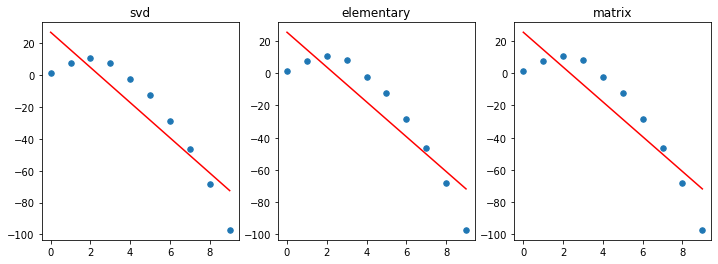

In [50]:
titles = ['svd', 'elementary', 'matrix']
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,4))
for i, beta in enumerate([beta1, beta2, beta3], 1):
    plt.subplot(1, 3, i)
    plt.scatter(x, y, s=30)
    plt.plot(x, beta[0] + beta[1]*x, color='red')
    plt.title(titles[i-1])

\begin{exercise}
Modify the above example to find a quadratic polynomial approximation to the data of the above example

\end{exercise}


In [51]:
import numpy as np
x = np.arange(10)
y = np.array([  1.58873597,   7.55101533,  10.71372171,   7.90123225,
                -2.05877605, -12.40257359, -28.64568712, -46.39822281,
                -68.15488905, -97.16032044])

def f(x, y, b):
    return (b[0] + b[1]*x + b[2]*x**2 - y)

def res(x, y, b):
    return sum(f(x,y, b)*f(x, y, b))

# Elementary form of gradient
def grad(x, y, b):
    n = len(x)
    return np.array([
            sum(f(x, y, b)),
            sum(x*f(x, y, b)),
            sum(x**2*f(x, y, b))
    ])

# Matrix form of gradient
def grad_m(X, y, b):
    return X.T@X@b- X.T@y

In [52]:
print(grad(x, y, np.zeros(3)))
X = np.c_[np.ones(len(x)), x,x**2]
grad_m(X, y, np.zeros(3))

[  227.0657638   1933.9094954  15758.14427298]


array([  227.0657638 ,  1933.9094954 , 15758.14427298])

In [53]:
beta1 = solve(X.T@X, X.T@y)
beta1

array([ 2.55079998,  7.31478229, -2.04118936])

In [54]:
a = 0.0001 # learning rate
beta2 = np.zeros(3)
for i in range(max_iter):
    beta2 -= a * grad(x, y, beta2)
beta2

array([ 2.73391723,  7.23152392, -2.03359658])

In [55]:
a = 0.0001 # learning rate
beta3 = np.zeros(3)
for i in range(max_iter):
    beta3 -= a * grad_m(X, y, beta3)
beta3

array([ 2.73391723,  7.23152392, -2.03359658])

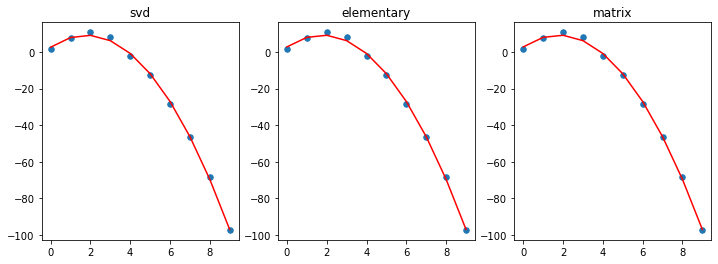

In [56]:
titles = ['svd', 'elementary', 'matrix']
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,4))
for i, beta in enumerate([beta1, beta2, beta3], 1):
    plt.subplot(1, 3, i)
    plt.scatter(x, y, s=30)
    plt.plot(x, beta[0] + beta[1]*x+beta[2]*x**2, color='red')
    plt.title(titles[i-1])

# Curve fitting and least squares optimization

As shown above, least squares optimization is the technique most associated with curve fitting. For convenience, `scipy.optimize` provides a `curve_fit` function that uses Levenberg-Marquadt for minimization.

In [57]:
from scipy.optimize import curve_fit 

In [58]:
def logistic4(x, a, b, c, d):
    """The four paramter logistic function is often used to fit dose-response relationships."""
    return ((a-d)/(1.0+((x/c)**b))) + d

In [59]:
nobs = 24
xdata = np.linspace(0.5, 3.5, nobs)
ptrue = [10, 3, 1.5, 12]
ydata = logistic4(xdata, *ptrue) + 0.5*np.random.random(nobs)

In [60]:
popt, pcov = curve_fit(logistic4, xdata, ydata) 

In [61]:
perr = yerr=np.sqrt(np.diag(pcov))
print('Param\tTrue\tEstim (+/- 1 SD)')
for p, pt, po, pe  in zip('abcd', ptrue, popt, perr):
    print('%s\t%5.2f\t%5.2f (+/-%5.2f)' % (p, pt, po, pe))

Param	True	Estim (+/- 1 SD)
a	10.00	 9.50 (+/- 0.64)
b	 3.00	 1.53 (+/- 0.69)
c	 1.50	 1.36 (+/- 0.20)
d	12.00	12.78 (+/- 0.59)


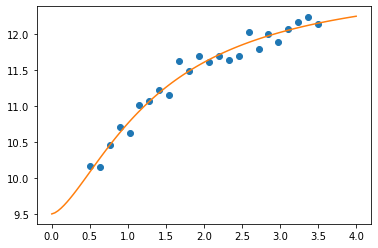

In [62]:
x = np.linspace(0, 4, 100)
y = logistic4(x, *popt)
plt.plot(xdata, ydata, 'o')
plt.plot(x, y)
pass

# Reading Material 

## Toy dataset for Regression 

We can try to fit this model to some data 

In [63]:
import pandas 

X = np.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

y = np.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

#Creating pandas dataframe from numpy array
dataset = pandas.DataFrame({'x_1':X[:,0],'x_2':X[:,1],'x_3':X[:,2],'x_4':X[:,3],'y':y})
dataset.head()

,x_1,x_2,x_3,x_4,y
0,3.0,3.0,4.0,0.0,4.0
1,3.0,3.0,3.0,0.0,3.0
2,3.0,2.0,2.0,5.0,2.0
3,2.0,2.0,4.0,0.0,3.0
4,3.0,3.0,4.0,4.0,3.0


[4. 3. 2. 3. 3. 4. 3. 2. 3. 3. 3. 3. 2. 2. 3. 2. 3. 3. 3. 3.]


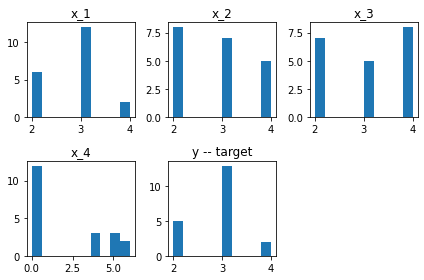

In [64]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy
features = ['x_1','x_2','x_3','x_4']
for j in range(X.shape[1]):    
    plt.subplot(2,3,j+1)
    plt.hist(X[:,j])
    plt.title(features[j])

plt.subplot(2,3,5)
print(y)
plt.hist(y)
plt.title('y -- target')
plt.tight_layout()  # ensure sensible layout of subplots


## Generate 3D and Contour Plots of 2D functions
**Example**
Create a contour plot of the function

$$ F = -(x-1)^2 - (y-2)^2 + xy/2$$ 

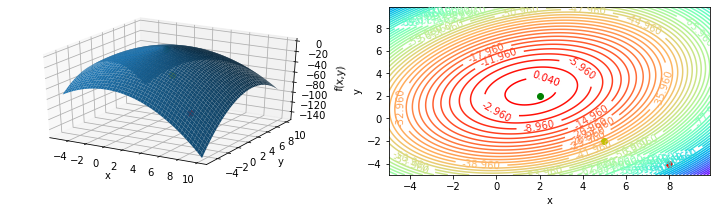

In [65]:
import matplotlib.cm as cm
x = numpy.arange(-5.0,10.0,0.1)
y = numpy.arange(-5.0,10.0,0.1)
X,Y = numpy.meshgrid(x,y)
F = -(X-1.0)**2.0 - (Y-2.0)**2.0 + 0.5*X*Y
fig = plt.figure(figsize=plt.figaspect(0.35))
from mpl_toolkits.mplot3d import Axes3D
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X,Y,F)
plt.tight_layout(6.0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.plot([x[130]],[y[10]],[F[130,10]],'ro')
ax.plot([x[70]],[y[70]],[F[70,70]],'go')
ax.plot([x[100]],[y[30]],[F[100,30]],'yo')
ax = fig.add_subplot(1,2,2)
C = ax.contour(X,Y,F,levels=numpy.arange(numpy.min(F),numpy.max(F),3),cmap=plt.cm.rainbow)
ax.clabel(C, inline=4, fontsize=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x[130],y[10],'ro')
ax.plot(x[70],y[70],'go')
ax.plot(x[100],y[30],'yo')

## Displays the direction of the gradient and a point

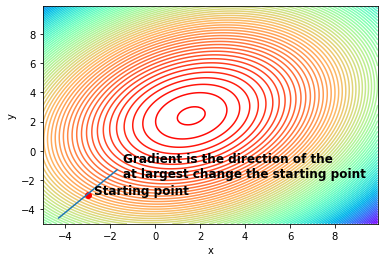

In [66]:
import matplotlib.cm as cm
x = numpy.arange(-5.0,10.0,0.1)
y = numpy.arange(-5.0,10.0,0.1)
X,Y = numpy.meshgrid(x,y)
F = -(X-1.0)**2.0 - (Y-2.0)**2.0 + 0.5*X*Y
dfdx = -2.0*(X-1.0) + 0.5*Y
dfdy = -2.0*(Y-2.0) + 0.5*X
C = plt.contour(X,Y,F,levels=numpy.arange(numpy.min(F),numpy.max(F),2),cmap=plt.cm.rainbow)
#ax.clabel(C, inline=4, fontsize=10)
plt.annotate('Starting point',(x[20]+0.25,y[20]),fontsize=12,fontweight='bold')
plt.plot(x[20],y[20],'ro')
x1 = x[20] -0.2*dfdx[20,20]
y1 = y[20] -0.2*dfdy[20,10]
x2 = x[20] +0.2*dfdx[20,20]
y2 = y[20] +0.2*dfdy[20,20]
plt.annotate('Gradient is the direction of the \nat largest change the starting point',(x2+0.25,y2-0.5),fontsize=12,fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([x1,x2],[y1,y2])

\begin{exercise}
Implement the regression - likelihood method for the toy problem

\end{exercise}


## Approximating gradients

Gradients are important because:

1. They can tell us when we have reached an optimum ($\nabla f(\mathbf x) = 0$)
2. Point in the direction in which function is changing the most

So, we shouldn't mess them up

To check your gradient go back to the definition:

$$
\frac{\partial}{\partial x_1} f(x_1,\dots,x_p) = \lim_{\delta \rightarrow 0} \frac{f(x_1 + \delta/2,\dots,x_p) - f(x_1 - \delta/2,\dots,x_p)}{\delta}
$$

Left side can be numerically approximated using a small $\delta=10^{-6}$:

$$
\frac{f(x_1 + 0.5\delta,\dots,x_p) - f(x_1 - 0.5\delta,\dots,x_p)}{\delta}
$$

This is called **finite difference approximation**, let's see this in practice.
The following code checks this approximation of gradient for two functions `f_broken` and `f_correct`.


In [67]:
import numpy
def grad_check(f,xy0,delta=1e-6,tolerance=1e-7):
    f0,g0 = f(xy0)
    p = len(xy0)
    finite_diff = numpy.zeros(p)
    gradient_correct = True
    for i in range(p):
        xy1 = numpy.copy(xy0)
        xy2 = numpy.copy(xy0)
        xy1[i] = xy1[i] - 0.5*delta
        xy2[i] = xy2[i] + 0.5*delta
        f1,_ = f(xy1)
        f2,_ = f(xy2)
        finite_diff = (f2 - f1)/(delta)
        if (abs(finite_diff - g0[i])>tolerance):
            print("Broken partial",i," Finite Diff: ",finite_diff," Partial: ",g0[i])
            gradient_correct = False
    return gradient_correct
def f_broken(xy):
    x = xy[0]
    y = xy[1]
    f = -(x-1.0)**2.0 - (y-2.0)**2.0 + 0.5*x*y
    dfdx = -2.0*(x-1.0) + 0.5*y
    dfdy = -2.0*(y-2.0) - 0.5*x
    grad = [dfdx,dfdy]
    return f,grad
def f_correct(xy):
    x = xy[0]
    y = xy[1]
    f = -(x-1.0)**2.0 - (y-2.0)**2.0 + 0.5*x*y
    dfdx = -2.0*(x-1.0) + 0.5*y
    dfdy = -2.0*(y-2.0) + 0.5*x
    grad = [dfdx,dfdy]
    return f,grad
xy = numpy.asarray([1.0,1.0]) 
print("f_broken has correct gradient:", grad_check(f_broken,[1.0,1.0])) 
print("f_correct has correct gradient:", grad_check(f_correct,[1.0,1.0]))


Broken partial 1  Finite Diff:  2.500000000349445  Partial:  1.5
f_broken has correct gradient: False
f_correct has correct gradient: True


## Implementation of the gradient ascent method

In [68]:
import matplotlib.pyplot as plt
def gradient_ascent(f,theta,init_step,iterations):  
    f_val,grad = f(theta)                       # compute function value and gradient 
    f_vals = [f_val]
    for it in range(iterations):                # iterate for a fixed number of iterations
        done = False                            # initial condition for done
        line_search_it = 0                      # how many times we tried to shrink the step
        step = init_step                        # reset step size to the initial size
        while not done and line_search_it<100:  # are we done yet?
            new_theta = theta + step*grad       # take a step along the gradient
            new_f_val,new_grad = f(new_theta)   # evaluate function value and gradient
            if new_f_val<f_val:                 # did we go too far?
                step = step*0.95                # if so, shrink the step-size
                line_search_it += 1             # how many times did we shrank the step
            else:
                done = True                     # better than the last theta, so we move on
        
        if not done:                            # did not find right step size
            print("Line Search failed.")
        else:
            f_val = new_f_val                   # ah, we are ok, accept the new theta
            theta = new_theta
            grad = new_grad
            f_vals.append(f_val)
        plt.plot(f_vals) 
    plt.xlabel('Iterations')
    plt.ylabel('Function value')
    return f_val, theta        

# Linear Regression -- Likelihood

We start by writing out a likelihood for linear regression is

$$
\mathcal L (\beta_0,\beta,\sigma^2 | \mathbf x,\mathbf y) = 
\prod_{i=1}^N p(y|\mathbf x,\beta_0,\beta,\sigma^2) = 
\prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left\{-\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right\}
$$

Log-likelihood for linear regression is

$$
\log\mathcal L (\beta_0,\beta,\sigma^2|\mathbf x,\mathbf y) = \sum_{i=1}^N \left[ -\frac{1}{2}\log 2\pi\sigma^2 -\frac{1}{2\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)^2\right].
$$



# Linear Regression -- Gradient of Log-Likelihood

Partial derivatives

$$
\begin{aligned}
\frac{\partial}{\partial \beta_0} \log\mathcal L (\beta_0,\beta,\sigma^2|\mathbf x,\mathbf y)  &= \sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-1)\\
\frac{\partial}{\partial \beta_k} \log\mathcal L (\beta_0,\beta,\sigma^2|\mathbf x,\mathbf y)  &= \sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-x_k)&,k\in\{1,\dots,p\}
\end{aligned}
$$

Hence gradient (with respect to $\beta$s)
$$
\nabla \mathcal L (\beta_0,\beta,\sigma^2|\mathbf x,\mathbf y) = \left[\begin{array}{c} 
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-1) \\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_1 + \sum_j x_j \beta_j)\right)(-x_1) \\
\vdots\\
\sum_{i=1}^N -\frac{1}{\sigma^2}\left(y_i-(\beta_0 + \sum_j x_j \beta_j)\right)(-x_p)
\end{array}
\right]
$$

In [69]:
X = numpy.asarray([[3.0,3.0,4.0,0.0],[3.0,3.0,3.0,0.0],[3.0,2.0,2.0,5.0],
[2.0,2.0,4.0,0.0],[3.0,3.0,4.0,4.0],[4.0,4.0,3.0,0.0],
[2.0,2.0,4.0,0.0],[2.0,2.0,2.0,0.0],[3.0,4.0,2.0,5.0],
[2.0,2.0,3.0,0.0],[2.0,4.0,2.0,0.0],[3.0,3.0,3.0,0.0],
[2.0,2.0,4.0,5.0],[4.0,3.0,2.0,6.0],[3.0,4.0,4.0,4.0],
[3.0,2.0,2.0,6.0],[3.0,3.0,3.0,0.0],[3.0,2.0,4.0,0.0],
[3.0,3.0,4.0,4.0],[3.0,4.0,2.0,0.0]])

Y = numpy.asarray([4.0,3.0,2.0,3.0,3.0,4.0,3.0,2.0,3.0,
3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0,3.0])

def linear_regression_log_likelihood(Y,X,betas,sigma2=1.0):
    ll = 0
    beta0 = betas[0]
    beta = betas[1:]
    dlldbeta0 = 0
    dlldbeta = numpy.zeros(len(beta))    
    for (x,y) in zip(X,Y):
        ll = ll -0.5*numpy.log(2*numpy.pi*sigma2)        
        res = y - beta0 - numpy.sum(x*beta)
        ll = ll - 1.0/(2.0*sigma2)*(res**2.0)
        dlldbeta0 = dlldbeta0 - 1.0/sigma2*res*(-1)
        dlldbeta = dlldbeta - 1.0/sigma2*(res*(-x))
    grad = numpy.zeros(len(beta)+1)
    grad[0] = dlldbeta0
    grad[1:] = dlldbeta
    return ll, grad

init_beta = [0.1]*5
f = lambda betas: linear_regression_log_likelihood(Y,X,betas)
grad_check(f,init_beta)


True

# Fitting Linear Regression Using Gradient Ascent

We are now ready to optimize our model

We will aim to find maximum of the log-likelihood function using the gradient ascent algorithm 
we implemented

Beta 0 = 0.2208399107471998
Beta x_1 = 0.27826872083818793
Beta x_2 = 0.3612567247447311
Beta x_3 = 0.34750079031358333
Beta x_4 = -0.1310460747774247


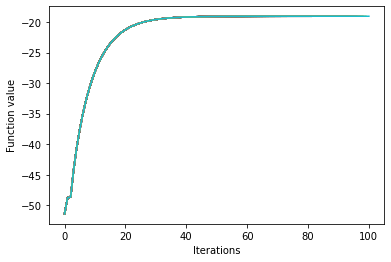

In [70]:

init_beta = [0.1]*5
init_step = 0.01
iterations = 1000
f = lambda betas: linear_regression_log_likelihood(Y,X,betas)
[f_best,betas_mle] = gradient_ascent(f,init_beta,0.01,100)
names = ['0','x_1','x_2','x_3','x_4']
for (name,beta) in zip(names,betas_mle):
    print('Beta',name,'=',beta)

\begin{exercise}
Use `sklearn` and `statsmodels` to apply regression to the toy example above.
Study the following example.
\end{exercise}


In [71]:
from sklearn import linear_model
import statsmodels.api as sm
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
T = numpy.asarray([4,4,3,0])
print ('Predicted Stock Index Price: \n', regr.predict([T]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 0.5642321263403121
Coefficients: 
 [ 0.22205474  0.34284882  0.30886232 -0.13083827]
Predicted Stock Index Price: 
 [3.75043335]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     15.37
Date:                Mon, 02 May 2022   Prob (F-statistic):           3.47e-05
Time:                        21:52:32   Log-Likelihood:               -0.92393
No. Observations:                  20   AIC:                             11.85
Df Residuals:                      15   BIC:                             16.83
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

# multiregression example using sklearn and statsmodel

In [72]:
from pandas import DataFrame

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 

df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


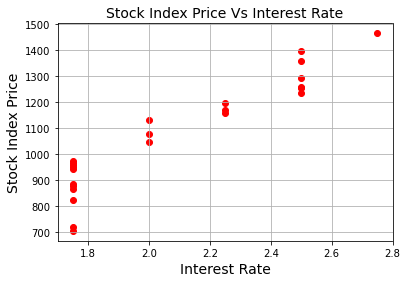

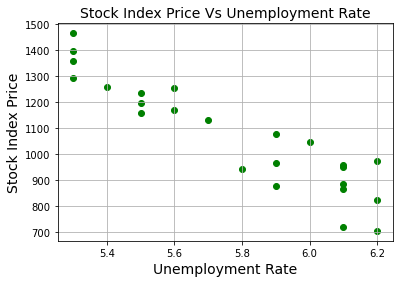

In [73]:
import matplotlib.pyplot as plt
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [74]:
from sklearn import linear_model
import statsmodels.api as sm

X = df[['Interest_Rate','Unemployment_Rate']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = df['Stock_Index_Price']
XX = numpy.asarray(X)
YY = numpy.asarray(Y)

Beta 0 = 1522.5492229371812
Beta x_1 = 379.122607582899
Beta x_2 = -212.08938030326027


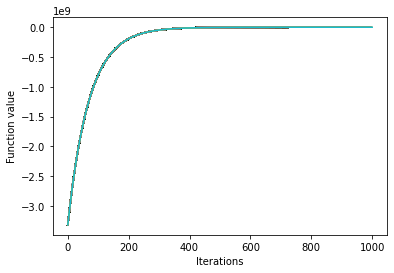

In [75]:
# Applies linear regression with MLE method to the above data
def linear_regression_log_likelihood(Y,X,betas,sigma2=1.0):
    ll = 0
    beta0 = betas[0]
    beta = betas[1:]
    dlldbeta0 = 0
    dlldbeta = numpy.zeros(len(beta))    
    for (x,y) in zip(X,Y):
        ll = ll -0.5*numpy.log(2*numpy.pi*sigma2)        
        res = y - beta0 - numpy.sum(x*beta)
        ll = ll - 1.0/(2.0*sigma2)*(res**2.0)
        dlldbeta0 = dlldbeta0 - 1.0/sigma2*res*(-1)
        dlldbeta = dlldbeta - 1.0/sigma2*(res*(-x))
    grad = numpy.zeros(len(beta)+1)
    grad[0] = dlldbeta0
    grad[1:] = dlldbeta
    return ll, grad
#####################################
init_beta = [2000]*3
init_step = 0.01
iterations = 1000
f = lambda betas: linear_regression_log_likelihood(YY,XX,betas)
[f_best,betas_mle] = gradient_ascent(f,init_beta,0.01,1000)
names = ['0','x_1','x_2']
for (name,beta) in zip(names,betas_mle):
    print('Beta',name,'=',beta)

In [76]:
 
# with sklearn and statmodels
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: \n', regr.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 1798.4039776258548
Coefficients: 
 [ 345.54008701 -250.14657137]
Predicted Stock Index Price: 
 [1422.86238865]
                            OLS Regression Results                            
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 02 May 2022   Prob (F-statistic):           4.04e-11
Time:                        21:52:46   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]